The **Word Bagging** is made of two words. Bootstraping and Aggregation.

Bootstraping means collecting samples out of given data.

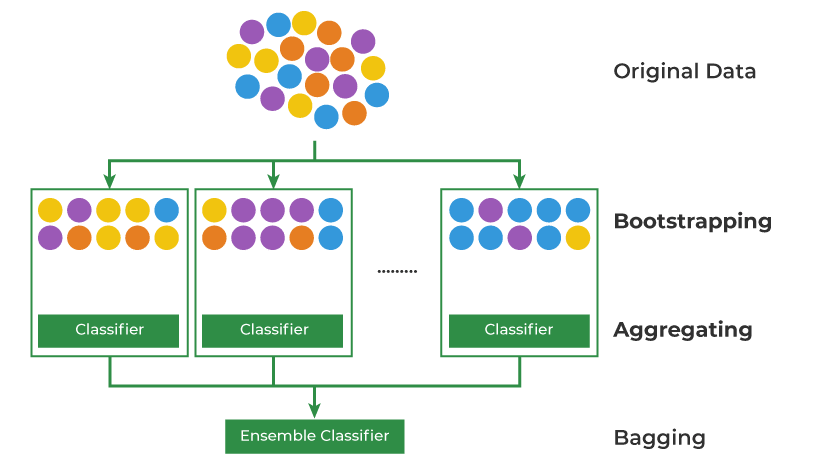

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
df = df.iloc[:,2:]
df.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [13]:
df = df[df["Species"] != 0][["SepalWidthCm","PetalLengthCm","Species"]]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [14]:
import seaborn as sns

<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

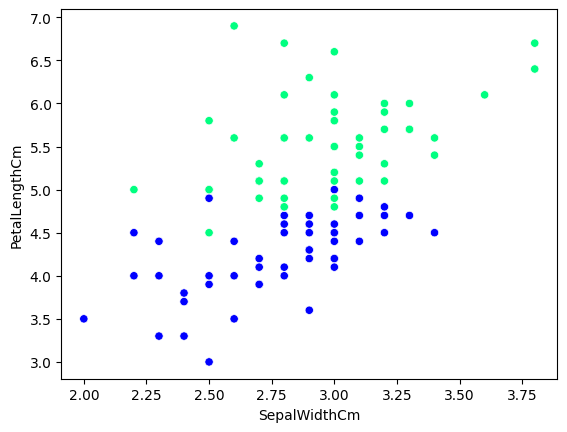

In [16]:
sns.scatterplot(df,x="SepalWidthCm",y="PetalLengthCm",c=df["Species"],cmap="winter")

In [17]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
98,2.5,3.0,1
68,2.2,4.5,1
66,3.0,4.5,1
72,2.5,4.9,1
96,2.9,4.2,1
89,2.5,4.0,1
76,2.8,4.8,1
105,3.0,6.6,2
99,2.8,4.1,1
109,3.6,6.1,2


In [18]:
# Taking only 10 rows for sampling
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)



In [19]:
df_train

,SepalWidthCm,PetalLengthCm,Species
149,3.0,5.1,2
56,3.3,4.7,1
146,2.5,5.0,2
102,3.0,5.9,2
51,3.2,4.5,1
60,2.0,3.5,1
66,3.0,4.5,1
89,2.5,4.0,1
119,2.2,5.0,2
98,2.5,3.0,1


In [20]:
df_val

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
142,2.7,5.1,2
140,3.1,5.6,2
81,2.4,3.7,1
116,3.0,5.5,2


In [21]:
df_test

,SepalWidthCm,PetalLengthCm,Species
126,2.8,4.8,2
77,3.0,5.0,1
106,2.5,4.5,2
122,2.8,6.7,2
137,3.1,5.5,2


In [22]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [23]:
X_test

array([[2.9, 5.6],
       [2.7, 5.1],
       [3.1, 5.6],
       [2.4, 3.7],
       [3. , 5.5]])

In [24]:
y_test

array([2, 2, 2, 1, 2])

# **Bagging**

In [25]:
## Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
146,2.5,5.0,2
66,3.0,4.5,1
60,2.0,3.5,1
66,3.0,4.5,1
119,2.2,5.0,2
146,2.5,5.0,2
66,3.0,4.5,1


In [27]:
# !pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

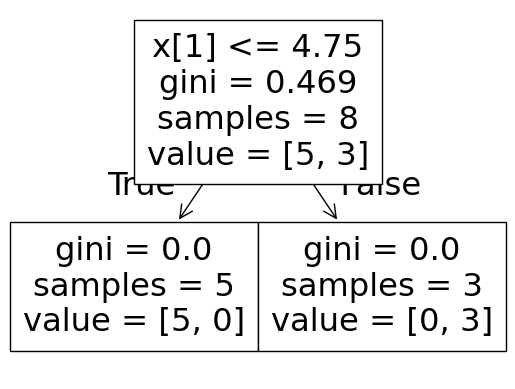

1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


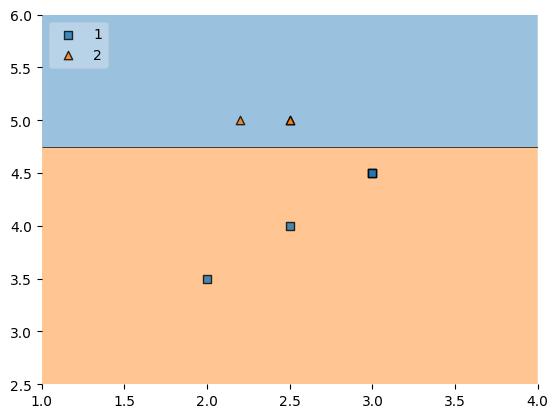

In [31]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [32]:
### Data For Tree 2
df_bag2 = df_train.sample(8,replace=True)

X = df_bag2.iloc[:,0:2]
y = df_bag2.iloc[:,-1]
df_bag2

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
98,2.5,3.0,1
66,3.0,4.5,1
51,3.2,4.5,1
146,2.5,5.0,2
102,3.0,5.9,2
60,2.0,3.5,1
119,2.2,5.0,2


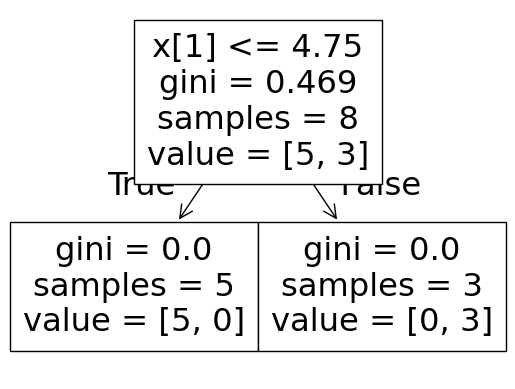

1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


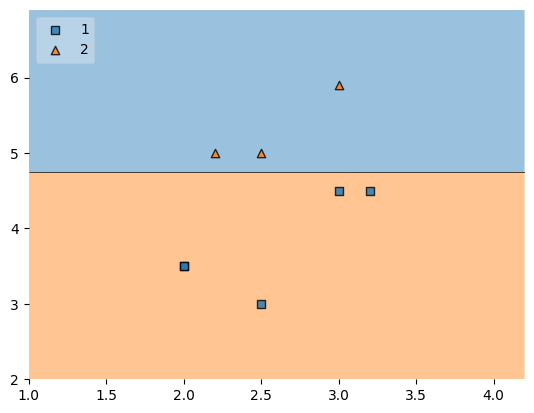

In [33]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [34]:
## Data For Tree 3
df_bag3 = df_train.sample(8,replace=True)

X = df_bag3.iloc[:,0:2]
y = df_bag3.iloc[:,-1]
df_bag3

,SepalWidthCm,PetalLengthCm,Species
51,3.2,4.5,1
119,2.2,5.0,2
119,2.2,5.0,2
51,3.2,4.5,1
119,2.2,5.0,2
66,3.0,4.5,1
51,3.2,4.5,1
102,3.0,5.9,2


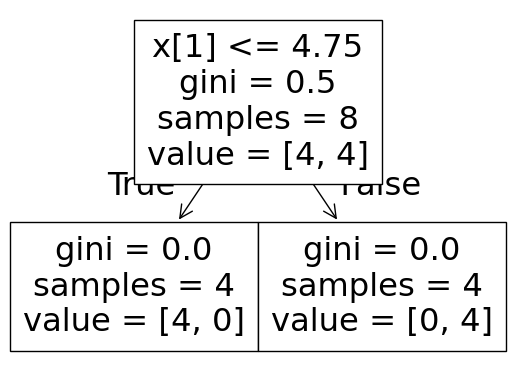

1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


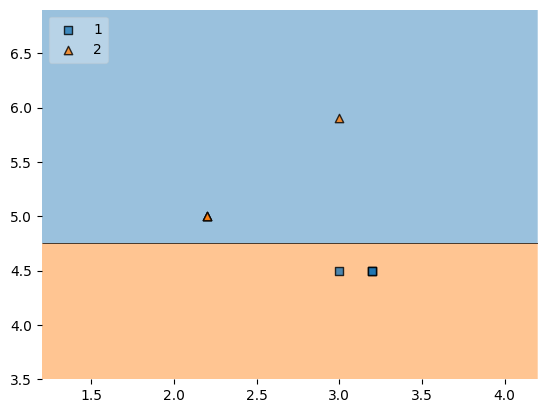

In [35]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [30]:
def evaluate(clf,X,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values,y.values,clf,legend=2)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test,y_pred))


# **Predict**

In [36]:
df_test

,SepalWidthCm,PetalLengthCm,Species
126,2.8,4.8,2
77,3.0,5.0,1
106,2.5,4.5,2
122,2.8,6.7,2
137,3.1,5.5,2


In [40]:
print(f"Prediction[1]",dt_bag1.predict([[2.8,6.7]]))
print(f"Prediction[1]",dt_bag2.predict([[2.8,6.7]]))
print(f"Prediction[1]",dt_bag3.predict([[2.8,6.7]]))

Prediction[1] [2]
Prediction[1] [2]
Prediction[1] [2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# **Pasting**

In [42]:
## Row Sampling without Replacement(Means No Repeatation)
df_train

,SepalWidthCm,PetalLengthCm,Species
149,3.0,5.1,2
56,3.3,4.7,1
146,2.5,5.0,2
102,3.0,5.9,2
51,3.2,4.5,1
60,2.0,3.5,1
66,3.0,4.5,1
89,2.5,4.0,1
119,2.2,5.0,2
98,2.5,3.0,1


In [43]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
119,2.2,5.0,2
102,3.0,5.9,2
66,3.0,4.5,1
98,2.5,3.0,1
146,2.5,5.0,2
89,2.5,4.0,1
56,3.3,4.7,1
51,3.2,4.5,1


# **Random Subspaces**

In [45]:
## Data Selection with Replacement (Means Duplication is Allowed)
df

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
112,3.0,5.5,2
138,3.0,4.8,2
149,3.0,5.1,2
127,3.0,4.9,2
...,...,...,...
94,2.7,4.2,1
64,2.9,3.6,1
77,3.0,5.0,1
148,3.4,5.4,2


In [50]:
# Random Spaces for Rows
df.sample(10,replace=True)

,SepalWidthCm,PetalLengthCm,Species
126,2.8,4.8,2
68,2.2,4.5,1
99,2.8,4.1,1
137,3.1,5.5,2
67,2.7,4.1,1
121,2.8,4.9,2
126,2.8,4.8,2
111,2.7,5.3,2
120,3.2,5.7,2
77,3.0,5.0,1


In [53]:
## Random Spaces for Column
df.sample(2,axis=1,replace=True)

,PetalLengthCm,Species
121,4.9,2
112,5.5,2
138,4.8,2
149,5.1,2
127,4.9,2
...,...,...
94,4.2,1
64,3.6,1
77,5.0,1
148,5.4,2


# **Random Patches**

In [54]:
df

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
112,3.0,5.5,2
138,3.0,4.8,2
149,3.0,5.1,2
127,3.0,4.9,2
...,...,...,...
94,2.7,4.2,1
64,2.9,3.6,1
77,3.0,5.0,1
148,3.4,5.4,2


In [56]:
## In this we do row sampling and column sampling
df.sample(10,replace=True).sample(2,replace=True,axis=1)

,PetalLengthCm,PetalLengthCm
141,5.1,5.1
64,3.6,3.6
86,4.7,4.7
63,4.7,4.7
131,6.4,6.4
148,5.4,5.4
64,3.6,3.6
110,5.1,5.1
82,3.9,3.9
95,4.2,4.2
